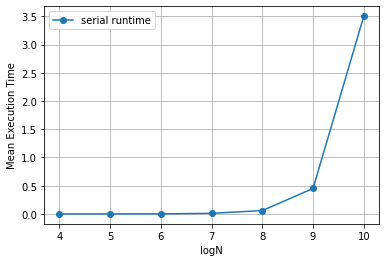

In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np

runs = 10
procs = 1 #0,4,8,12,16
prob =  7 #16,32,64,..,4096
problem_size = [i for i in range(4,4+prob)]
 
alg_time = [[0. for i in range(prob)] for j in range(procs)]
e2e_time = [[0. for i in range(prob)] for j in range(procs)]
# speedup = [[0. for i in range(prob)] for j in range(procs)]
# efficiency = [[0. for i in range(prob)] for j in range(procs)]

# file format : problem_size, processor, run_id, alg_time, e2e_time
with open('data.txt','r') as file:
    lines = file.readlines()
    for line in lines:
        words = map(float,line.split(','))
        words = list(words)
        #change the below line according to problem size
        words[0] = int(math.log(words[0],2))-4
        words[1] = int(words[1])//4
        alg_time[words[1]][words[0]] += words[3]
        e2e_time[words[1]][words[0]] += words[4]

for i in range(procs):
    for j in range(prob):
        alg_time[i][j] = alg_time[i][j]/runs

# for i in range(procs):
#     for j in range(prob):
#         speedup[i][j] = alg_time[0][j]/alg_time[i][j]
#         if i!=0:
#             efficiency[i][j] = speedup[i][j]/(4*i)

plt.figure()
plt.grid()
plt.xlabel('logN')
plt.ylabel('Mean Execution Time')
for i in range(procs):
    plt.plot(problem_size,alg_time[i],'o-',label='serial runtime')
    plt.legend()

# plt.figure()
# plt.grid()
# plt.xlabel('logN')
# plt.ylabel('Speedup')
# for i in range(procs):
#     plt.plot(problem_size,speedup[i],label=str(4*i)+' threads')
#     plt.legend()
# plt.figure()
# plt.grid()
# plt.xlabel('logN')
# plt.ylabel('Efficiency')
# for i in range(procs):
#     plt.plot(problem_size,efficiency[i],label=str(4*i)+' threads')
#     plt.legend()
